# Classification of Lathe's Cutting Tool Wear Base on an Autonomous Machine Learning Model

Machining processes are of considerable significance to industries such as aviation, power generation, oil, and gas since a significant part of the industrial mechanical components went through a machining process during its manufacturing. Therefore, using worn cutting tools can lead to operational interruptions, accidents, and potential economic losses during these processes. Concerning these consequences, real-time monitoring can result in cost reduction, along with productivity and safety increase. This paper aims to discuss an autonomous model based on the Self-Organised Direction Aware Data Partitioning Algorithm (SODA) and machine learning techniques, including time series Feature Extraction based on Scalable Hypothesis tests (TSFRESH), to solve this problem. The model proposed in this work was tested in a data set recorded in a real machining system at the Manufacturing Processes Laboratory of the Federal University of Juiz de Fora (UFJF) in collaboration with the Laboratory of Industrial Automation and Computational Intelligence (LAIIC). This model can identify the patterns that distinguish the cutting tool operations as healthy or inadequate, achieving satisfactory performances in all cases presented in this work and potentially allowing to prevent faulty pieces fabrication.

In [1]:
import numpy as np
import pandas as pd
from lathes_model import LathesModel, Lathes_train_test_split

## Load Input Data

The data set used in this work consists of 592 time-series recorded with National Instruments USB-6210 using an acquisition rate of 12 kHz. Each time series is a collection of 750 measurements of electric voltage and current from the 3 phases of the lathes’ electric motor. (See /Input/README.md for further information).

To execute the example, it will be needed to split the dataset between train and test subsets.

Initialize model's class

In [2]:
params = {'N_PCs':3,
          'granularity':4}

model = LathesModel()

IndexError: index 94176768 is out of bounds for axis 0 with size 94176768

# 4. The Lathe's cutting Tool Prognostic Model

## 4.2 Training Phase

### 4.2.1 Stage 1: Feature Extraction and Selection

The Features Extraction and Selection module begin with the normalization of the collection of time series. Let $t_k$ be the normalized values of $k^{th}$ time series
$T_k$. The normalization applied follow the equation below.

 - Equation 1:
      $$ t_k(i,j) = \frac{T_k(i,j) - min(T_k(j))}{max(T_k(j)) - min(T_k(j))} $$


In [5]:
model._normalization()

The TSFRESH framework (Christ et al., 2018) is capable of extracting 77 features from each variable of the time series. These features are extracted with different parameters. Hence, one feature returns multiple outputs. For instance, the Fourier Transformation returns the real part, the imaginary part, the absolute value, and the angle in degrees.

In [6]:
X_extracted = model._tsfresh_extraction()

Feature Extraction: 100%|██████████| 20/20 [08:42<00:00, 26.13s/it]


The most relevant features for distinguishing the fault occurrences are selected using a hypothesis test and are stored in the matrix F. The Feature Extraction and Selection module also stores a python dictionary containing the most pertinent features. The model uses this dictionary to extract only the relevant features at the online phase.

In [7]:
model._tsfresh_selection()

model.kind_to_fc_parameters_

{'Sensor_3': {'quantile': [{'q': 0.9},
   {'q': 0.8},
   {'q': 0.7},
   {'q': 0.6},
   {'q': 0.4}],
  'agg_linear_trend': [{'attr': 'stderr', 'chunk_len': 50, 'f_agg': 'mean'},
   {'attr': 'stderr', 'chunk_len': 10, 'f_agg': 'mean'},
   {'attr': 'stderr', 'chunk_len': 5, 'f_agg': 'mean'},
   {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'max'},
   {'attr': 'intercept', 'chunk_len': 10, 'f_agg': 'max'},
   {'attr': 'stderr', 'chunk_len': 5, 'f_agg': 'min'},
   {'attr': 'intercept', 'chunk_len': 50, 'f_agg': 'mean'},
   {'attr': 'intercept', 'chunk_len': 10, 'f_agg': 'mean'},
   {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'mean'},
   {'attr': 'stderr', 'chunk_len': 5, 'f_agg': 'max'},
   {'attr': 'intercept', 'chunk_len': 50, 'f_agg': 'max'},
   {'attr': 'stderr', 'chunk_len': 10, 'f_agg': 'min'},
   {'attr': 'stderr', 'chunk_len': 10, 'f_agg': 'max'},
   {'attr': 'intercept', 'chunk_len': 50, 'f_agg': 'var'},
   {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'var'},
   {'attr': 'int

### 4.2.2 Stage 2: Dimensionality Reduction

The Dimensionality Reduction module begin with the standardization of the collection of features $f$ be the standardized values of $k^{th}$ selected features $F$. The standardization applied follow the following equation.

 - Equation 2:
$$ f_{i,j} = \frac{F_{i,j} - \mu_i}{\sigma_i} $$

Where $f_{i,j}$ is the standardized value of the $i^{th}$ feature at the $j^{th}$ time series, $\sigma_i$ is the standard deviation of the corresponding feature, and $\mu_i$ is the feature mean. Note that each feature is standardized independently.


Given the collection of features $f = f_1, f_2, ..., f_n∗$, where $n∗$ is the number of TSFRESH selected features, it is possible to investigate a smaller set of variables, within $f$, in which their linear combination $\alpha_kf$ preserves a major part of the information available with maximum variance. These variable are called principal
components and the first of the principal components is $z_1$, known for comprising the major variability of the
data:

- Equation 3:
$$ z_1 = \alpha_(11)x_1 + \alpha_(12)x_2 + ... + \alpha_(1n)x_n $$

The other components are calculated analogously and the $l^{th}$ principal component must not be correlated to the previous components (Jolliffe, 1986):

 - Equation 4:
$$ z_l = \alpha_(l1)x_1 + \alpha_(l2)x_2 + ... + \alpha_(ln)x_n $$


In [8]:
model._pca()

### 4.2.3 Stage 3: Data Partitioning

In this work, the data partitioning procedure delivered by SODA (Gu et al., 2018) was applied to provide non-parametric and data-driven labels to the data set. The main steps ofthe SODA algorithm include: firstly, form a number of Direction-Aware (DA) planes from the observed data samples using both, the magnitude-based and angular-
based densities; secondly, identify focal points; finally, use the focal points to partition the data space into data clouds and then find the optimal number of partitions for the input data.

In [9]:
model._soda()

### 4.2.4 Stage 4: Grouping algorithm

The SODA algorithm is a non-parametric and data-driven approach. Hence, the user does not interfere directly in the data partitioning results. Consequently, SODA may divide the data into data clouds that does not match the number of groups delivered to the TSFRESH analyses. Therefore, this algorithm aims to gather all data clouds that hold information belonging to the same group. As well as related to each data sample, contained in those clouds, a label that was used in the classification module. The groups of data are: adequate condition tools (Index = 0) and inadequate condition tools (Index = 1)

In [10]:
model._grouping_algorithm()

### 4.2.5 Stage 5: Classifiers Training

The Classifier Training module is responsible for training the classifier that will be used in the online phase.
To execute the training, this module delivers to the classifier the projected features along with the target. At the end of the stage, the classifier is ready to distinguish the tool condition from the data stream.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [12]:
classifiers = [KNeighborsClassifier(3),
        SVC(gamma='scale'),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "Radial-basis function kernel SVM", 
         "Radial-basis function kernel Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "MLP Neural Network", 
         "AdaBoost",
         "Gaussian Naive Bayes", 
         "Quadratic Discriminant Analysis"]

In [13]:
for clf_name, clf in zip(names, classifiers):
    clf.fit(model.X_projected_, model.target_)

## 4.3 Online Phase

We summarize and present the main procedures of the proposed model for streaming data processing in a form of pseudo-code as follows.

~~~

Algorithm 1 Online Stage
Input:
 - Selected Features provided by Stage 1 Features Extraction and Selection of the training phase
 - Principal Components provided by Stage 2 Dimensionality Reduction of the training phase
 - Trained Classifier provided by Stage 5 Classifier Training of the training phase
 - Data Stream
 
Procedure:
 1: Normalize the streaming data following Equation 1;
 2: Extract the Selected Features from the streaming data;
 3: Standardize the extracted features following Equation 2;
 4: Project the standardized features using the Principal Components;
 5: Classify tool condition using the Trained Classifier;
 
Output: Classification of the tool condition;

~~~

In [14]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from datetime import datetime

In [15]:
tac = datetime.now()

model._predict_normalization()

model._predict_tsfresh_extraction()

model._predict_pca()

tic = datetime.now()

Feature Extraction: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


In [16]:
y_test = model.yy_test[::750]

Classifiers_result = {}

for clf_name, clf in zip(names, classifiers):
    clf_tac = datetime.now()
    
    Classifiers_result[clf_name] = {}
    
    y_pred = clf.predict(model.X_test_projected_)
    Classifiers_result[clf_name]['Accuracy'] = accuracy_score(y_test,y_pred)*100
    Classifiers_result[clf_name]['Precision'] = precision_score(y_test, y_pred,zero_division=0)*100
    Classifiers_result[clf_name]['Recall'] = recall_score(y_test, y_pred,zero_division=0)*100
    Classifiers_result[clf_name]['F1'] = f1_score(y_test, y_pred,zero_division=0)*100
    
    clf_tic = datetime.now()
    Classifiers_result[clf_name]['Time'] = ((tic - tac) + (clf_tic - clf_tac))

# 5. Experimental Results

## 5.1 Features and Sensor Relevance Analysis

Based on the PCA results, an influence analysis for the selected features is carried out in this Section. The first 3 PC’s were kept granting 30.61% of the total variance presented in the Figure below. Note that, using more components would neither significantly increase the total variance nor improve the classification.

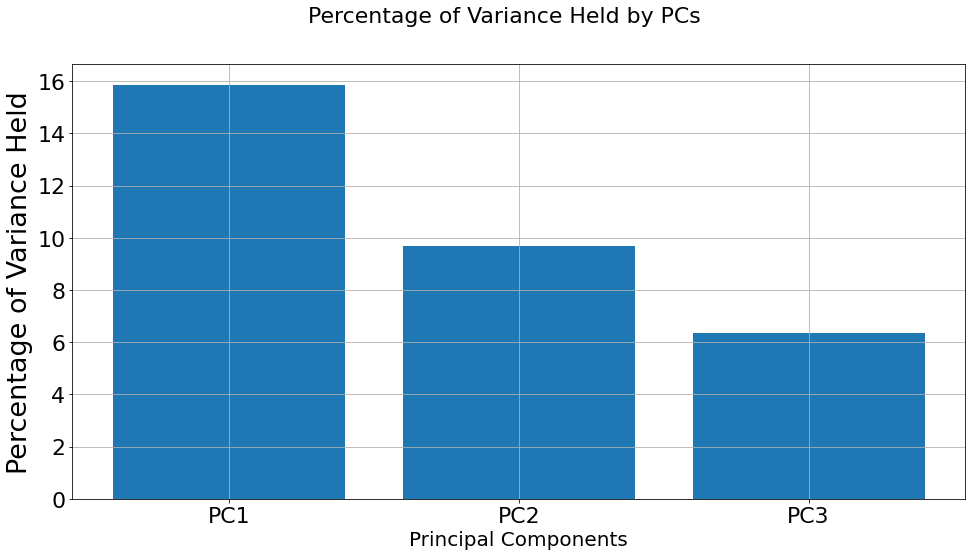

In [17]:
model.plot_variation_held(show=True, 
                          PATH='Results/Fig_5__Variation_held_by_each_Principal_Component.png')

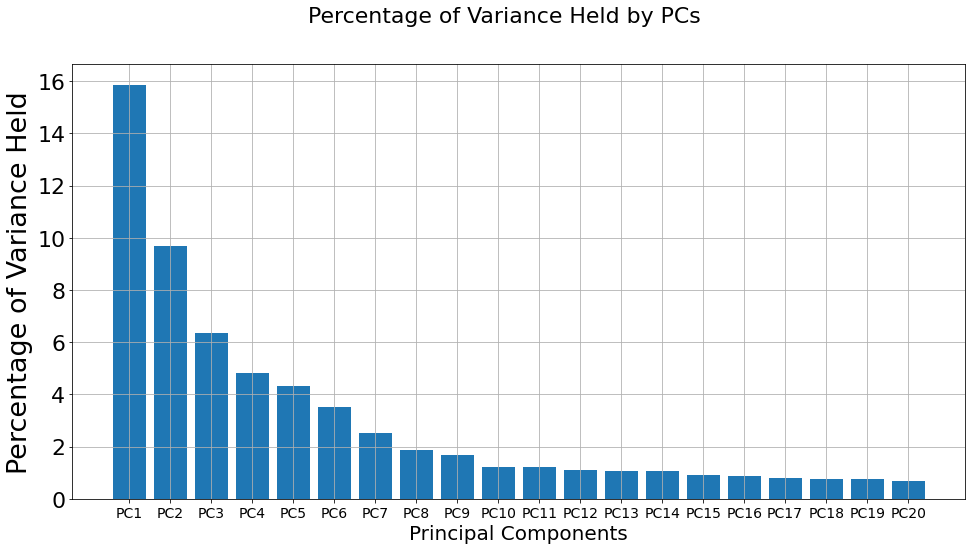

In [26]:
model.change_hyperparams({'N_PCs':20})

model._pca()
model.plot_variation_held(show=True, 
                          PATH='Results/Fig_5__Variation_held_by_each_Principal_Component_20PCs.png',
                         x_ticks_fontsize=14)

model.change_hyperparams({'N_PCs':3})
model._pca()

The PCA method, by the means of the calculation of the principal components, provides the capability to define the relevance of the features and sensors used on the time series analyses. The constants $\alpha_{j,k}$ in Equation
4 act as weights in the calculation of the principal components, therefore indicating the relevance of each
selected feature and sensor. Accordingly, the percentage of relevance of sensors are presented in Figures below.

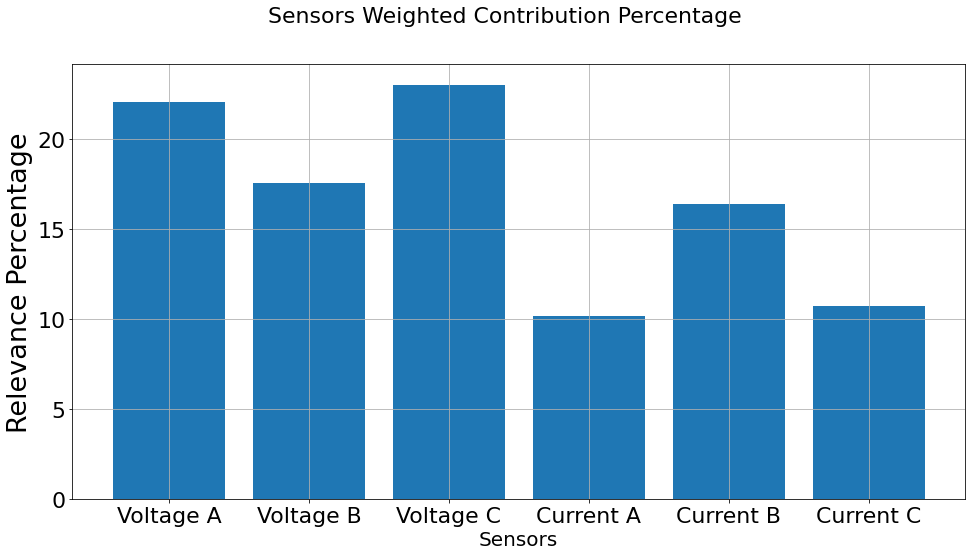

In [19]:
model.plot_sensor_contribution(show=True,
                               PATH='Results/Fig_6__Relevance_Percentage_of_each_sensor.png',
                               sensor_names=['Voltage A', 'Voltage B', 'Voltage C',
                                             'Current A', 'Current B', 'Current C'])

In addition, the following Figure presents the 20 most relevance features, which are exhibited in the Table below.

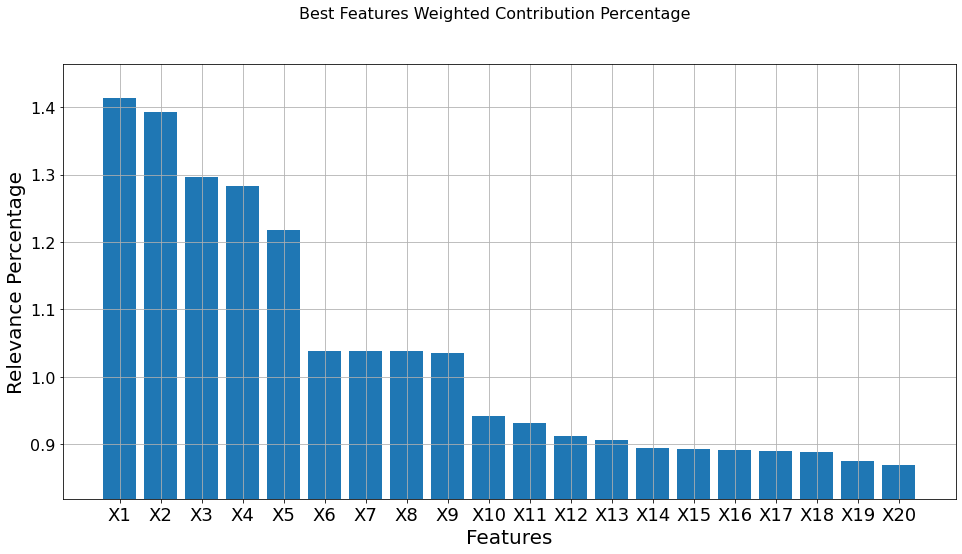

In [20]:
model.plot_best_features_contribution(show=True,
                               PATH='Results/Fig_7__Relevance_Percentage_of_the most_20_relevant_features.png',
                               best=20)

In [21]:
s = dict(sorted(model.features_contribution_.items(), 
                            key=lambda item: item[1], reverse=True))
s_20 = pd.DataFrame([s]).iloc[:,0:20].T

s_20

,0
"fft_coefficient__attr_""abs""__coeff_4",1.414392
"fft_coefficient__attr_""abs""__coeff_3",1.392880
"agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""",1.296793
"agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",1.283021
fourier_entropy__bins_2,1.217243
absolute_sum_of_changes,1.037652
"change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",1.037652
mean_abs_change,1.037652
"agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""",1.035548
"fft_coefficient__attr_""abs""__coeff_2",0.941950


The relevance exhibits that the majority of the selected features, as well as the sensors, are relevant for the calculation of the principal components, with more importance for the voltage time series, and consequently for the classification of the cutting tool state. Furthermore, as presented, the 20 most relevant features represent together only 20.16% of the total relevance, which indicates that the model needs more information to properly solve the addressed problem. Aiming to illustrate this conclusion, the following Figure presents a visualization of the 3 most relevant features calculated for the most relevant sensor. According Figure 8, to distinguish the cutting tools, using a reduced number of features, would be a highly troublesome task, since their data are superimposed. On the other hand, the model employs dimensionality reduction, provided by PCA, along with SODA
which exhibits good performance on large-scale and high-dimensional problems (Gu et al., 2018). Therefore using a large number of features would not compromise the model classification task. Consequently, it was decided to maintain all the selected features.

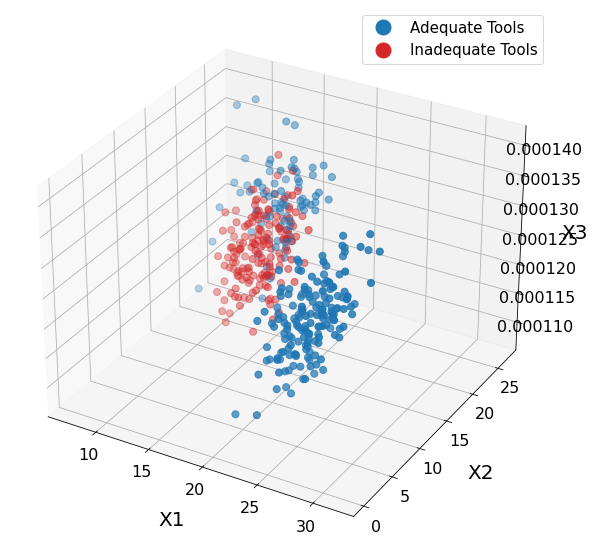

In [27]:
model.plot_scatter_features(show=True,
                    PATH='Results/Fig_8__Plot_of_Normalized_Features_X1_X2_and_X3_calculated_for_Voltage.png')

## 5.2 Classification

The SODA (Gu et al., 2018) divided the data into 4 data clouds. The grouping algorithm divided these clouds into groups as follows: adequate condition tools’ clouds, inadequate condition tools’ clouds. The data was labeled according to this division.

The classifiers implemented in this work were based on scikit-learn (Pedregosa et al., 2011), an open-source machine learning library in python. Even though other configurations, for the classifiers, were experimented, the maximum accuracy was achieved with the configurations presented in the example that follows https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html, except from the Decision Tree, the Random Forest and the MLP methods.

In the Decision tree and in the Random Forest methods, the maximum depth of the tree was not defined, therefore the nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples. In the MLP the maximum number of iterations was set to 200.

In [23]:
results = pd.DataFrame(Classifiers_result).T

results

,Accuracy,Precision,Recall,F1,Time
Nearest Neighbors,100.0,100.0,100.0,100.0,0 days 00:02:01.671261
Linear SVM,100.0,100.0,100.0,100.0,0 days 00:02:01.660332
Radial-basis function kernel SVM,69.662921,100.0,25.0,40.0,0 days 00:02:01.662390
Radial-basis function kernel Gaussian Process,100.0,100.0,100.0,100.0,0 days 00:02:01.661918
Decision Tree,99.438202,100.0,98.611111,99.300699,0 days 00:02:01.659901
Random Forest,98.876404,100.0,97.222222,98.591549,0 days 00:02:01.670832
MLP Neural Network,100.0,100.0,100.0,100.0,0 days 00:02:01.660190
AdaBoost,98.876404,100.0,97.222222,98.591549,0 days 00:02:01.668225
Gaussian Naive Bayes,98.876404,100.0,97.222222,98.591549,0 days 00:02:01.660039
Quadratic Discriminant Analysis,100.0,100.0,100.0,100.0,0 days 00:02:01.660039


The Radial-basis function kernel SVM was the only classifier that does not present consistent results in Table 3. The other classifiers presented similar results in all metrics. Thus, they are all suitable for the classification module of the model. However, the proposed model was designed to use only one classifier. Therefore we choose the Linear SVM as the best option owing to its low computational cost.

# References

 - M. Christ, N. Braun, J. Neuffer, and A. W. Kempa-Liehr. Time series feature extraction on basis of scalable hypothesis tests (tsfresh - a python package). Neurocomputing, 307:72-77, 2018. DOI: https://doi.org/10.1016/j.neucom.2018.03.067.
 - I. T. Jollife. Principal Component analysis and Factor Analysis. Springer New York, New York, NY, 1986. DOI: https://doi.org/10.1007/978-1-4757-1904-8_7.
 - X. Gu, P. P. Angelov, D. Kangin, and J. C. Principe, Self-organised direction aware data partitioning algorithm. Information Sciences, 423:80-95, 2018. DOI: https://doi.org/10.1016/j.ins.2017.09.025.
 - F. Pedregosa, G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, P. Prettenhofer, R. Weiss, V. Dubourg, J., Vanderplas, A. Passos, D. Cournapeau, M. Brucher, M. Perrot, and E. Duchesnay. Scikit-learn: Machine learning in python. Journal of Machine Learning Research, 12(85):2825–2830, 2011. URL http://jmlr.org/papers/v12/pedregosa11a.html.
